In [600]:
#Importing all the stuffs

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from bokeh.plotting import figure, show

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#os.chdir('~~~ProjectFolder~~~')

#Data from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [849]:
cells = pd.read_csv('data.csv', index_col=-1)
cells['diagnosis'] = cells['diagnosis'].apply(lambda x: 1 if x=='M' else 0)
cells.head()

cdiagnosis = cells.groupby('diagnosis').count()
cdiagnosis = cdiagnosis.filter(['id'])

In [850]:
X = cells.drop(['diagnosis', 'id'], axis=1)
y = cells['diagnosis']

X.size

17070

In [603]:
#Splitting for training subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [604]:
#Normalizing the data 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [605]:
#Making a classifier with a Random Forest algorithm 

clasf = RandomForestClassifier(n_estimators=100, max_depth=4)

In [606]:
#Training 

clasf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [607]:
#Performance of the training set

clasf.score(X_train, y_train)

#Score:
#0.9929577464788732

0.9906103286384976

In [608]:
#Performance on the test sets

y_prediction = clasf.predict(X_test)
accuracy_score(y_test, y_prediction)

#Accuracy score achieved with test set:
#0.95804195804195

0.965034965034965

In [609]:
#Performance on the original dataset

yinit = clasf.predict(X)
accuracy_score(y, yinit)

#Score:
#0.37258347978910367
#Thats..... not ideal, lets see if we can improve this 

0.37258347978910367

In [610]:
#Normalizing the original dataset

sc = StandardScaler()
X_normalized = sc.fit_transform(X)

In [611]:
#Calculate Eigenvalues

pcacellall = PCA(n_components = 30).fit(X_normalized)

varianceall = pcacellall.explained_variance_ratio_

print(variance)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525]


In [193]:
#Cumulative variance explained

varall=np.cumsum(np.round(pcaheartall.explained_variance_ratio_, decimals=3)*100)
varall

array([ 44.3,  63.3,  72.7,  79.3,  84.8,  88.8,  91.1,  92.7,  94.1,
        95.3,  96.3,  97.2,  98. ,  98.5,  98.8,  99.1,  99.3,  99.5,
        99.7,  99.8,  99.9, 100. , 100.1, 100.2, 100.3, 100.3, 100.3,
       100.3, 100.3, 100.3])

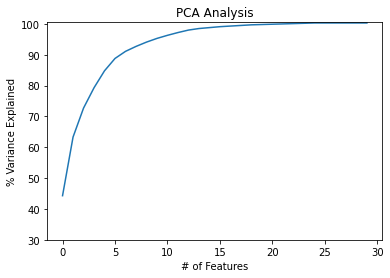

In [194]:
#Plotting variance explained

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis', fontsize=12)
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(varall)

In [235]:
pcell = PCA(n_components = 30).fit_transform(X_normalized)
pcelldf = pd.DataFrame(pcell) #for plotting raw data

pcelldf.head

<bound method NDFrame.head of             0          1         2         3         4         5         6   \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716326   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223082   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698952   

           7         

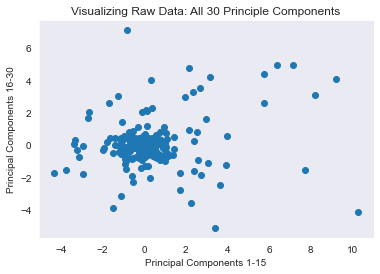

In [863]:
#Just a quick visual of all 30 clusters

plt.ylabel('Principal Components 16-30')
plt.xlabel('Principal Components 1-15')
plt.title('Visualizing Raw Data: All 30 Principle Components', fontsize=12)
plt.scatter(pcelldf[0:14],pcelldf[15:29])

plt.savefig('Visualising30.png', dpi=300)

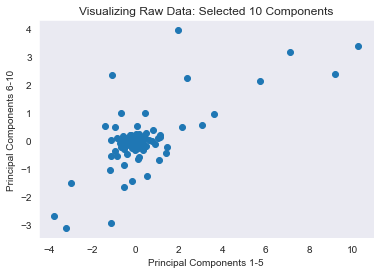

In [862]:
#The 10 I chose to select, which account for 95.3% of the variance

plt.ylabel('Principal Components 6-10')
plt.xlabel('Principal Components 1-5')
plt.title('Visualizing Raw Data: Selected 10 Components', fontsize=12)
plt.scatter(pcelldf[0:4],pcelldf[5:9])

plt.savefig('Visualising10.png', dpi=300)

In [437]:
#Selecting the first 10 Primary Components 

pcacell = PCA(n_components = 10).fit_transform(X_normalized)


In [451]:
#Applying K Cluster model, sorting into 2 diagnostic clusters

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
x_clustered = kmeans.fit_predict(pcacell)
acc= accuracy_score(y, x_clustered)
    
clusterplot = pd.DataFrame(pcacell)
clusterplot['X_cluster'] = x_clustered

In [561]:
#Establishing incorrect values

#0 -> Correct Diagnosis: Benign
#1 -> Correct Diagnosis: Malignant
#2 -> Incorrect Diagnosis: Benign
#3 -> Incorrect Diagnosis: Malignant

temp = pd.DataFrame(cells['diagnosis'])
tempb = pd.DataFrame(clusterplot.copy())
tempb['y'] = temp['diagnosis'].values == tempb['X_cluster'].values
tempb.loc[((tempb['y'] == False) & (tempb['X_cluster'] == 0)), 'X_cluster'] = 2
tempb.loc[((tempb['y'] == False) & (tempb['X_cluster'] == 1)), 'X_cluster'] = 3


clusterplot['X_cluster'] = tempb['X_cluster']


,0,1,2,3,4,5,6,7,8,9,X_cluster
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159371,-0.398407,-0.157122,-0.877393,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711904,1.106996,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668169,0.097368,0.024075,0.454316,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429908,1.059557,-1.405424,-1.116921,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636379,-0.263809,0.377685,1


In [859]:
#Accuracy
ac = str(round((acc*100), 2)) + '%'
ac

'91.04%'

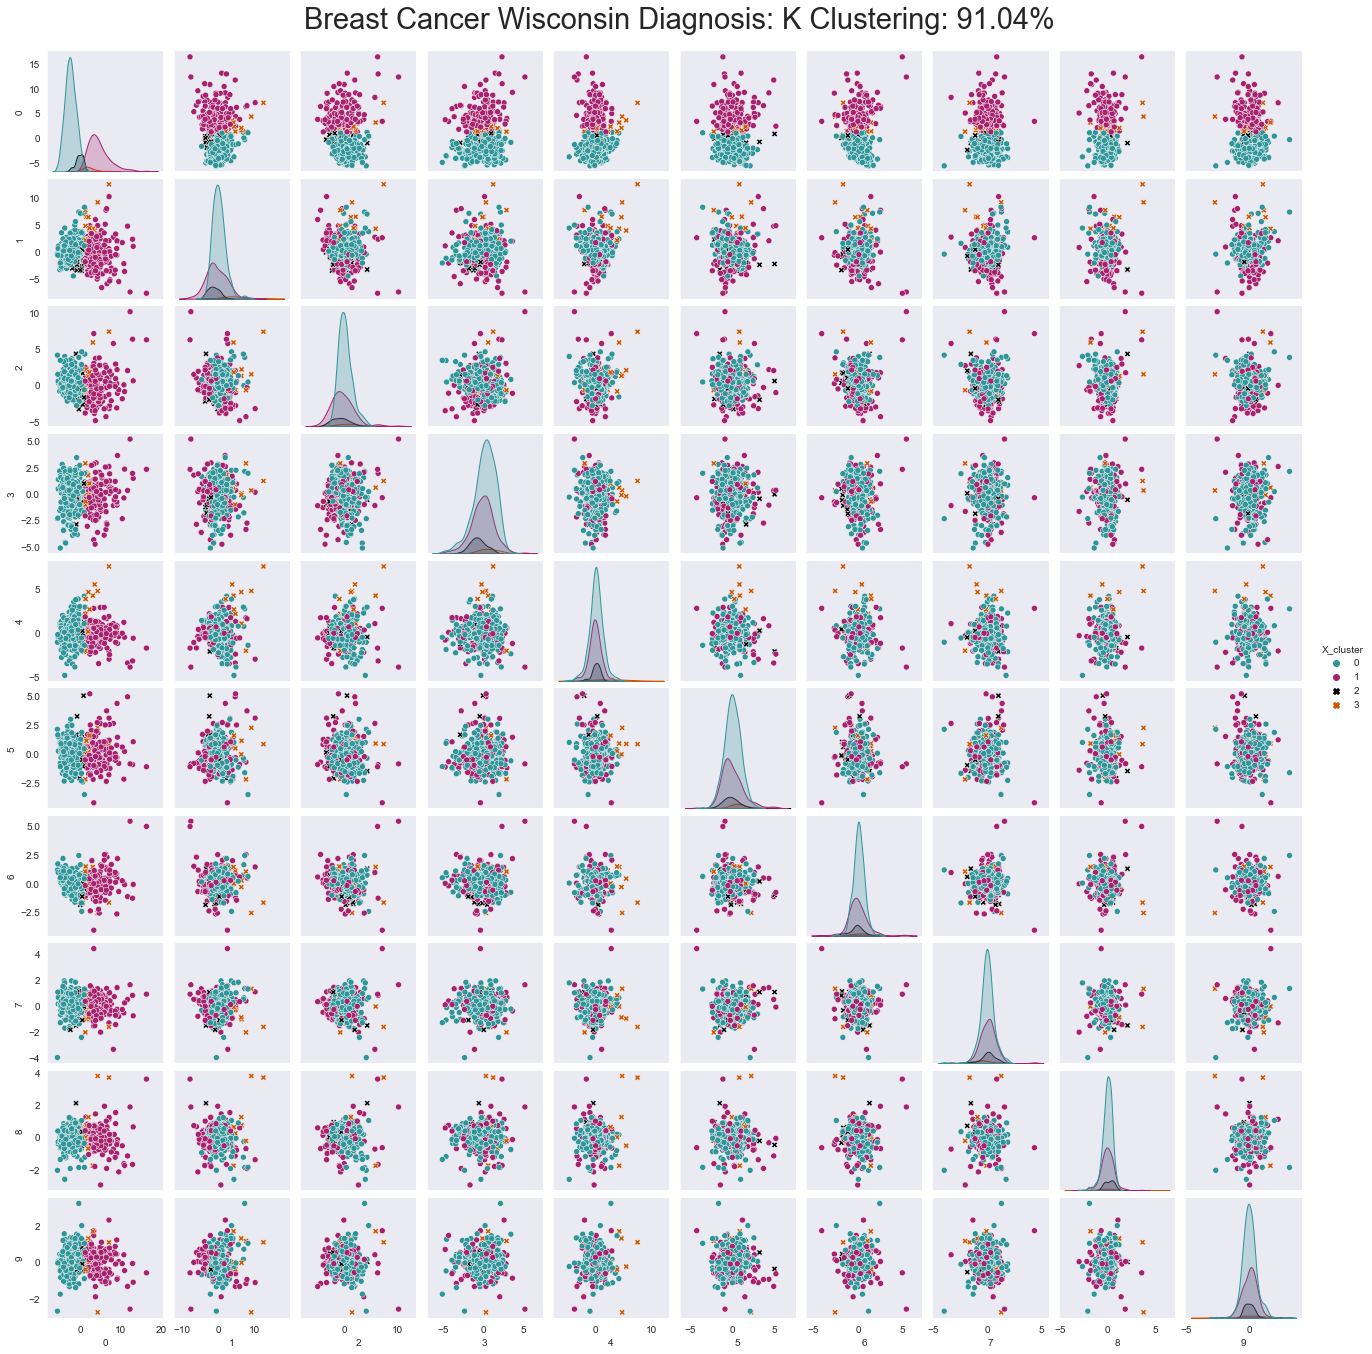

In [861]:
#Scatterplot

sns.set_style("dark")
flatui = ["#2F9599","#A7226E", "#000000", '#cc5500']
pairs = sns.pairplot(clusterplot,
             hue='X_cluster',
             palette= flatui,
             diag_kind='kde',
             markers=['o', 'o', 'X', 'X'],
             height=1.85)
plt.suptitle("Breast Cancer Wisconsin Diagnosis: K Clustering: {}".format(ac), y=1.02, fontsize = 29)



plt.savefig('BCWD.KCluster.png', dpi=300)

In [623]:
pcacelldf = pd.DataFrame(pcacell) 

,0,1,2,3,4,5,6,7,8,9
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159371,-0.398407,-0.157122,-0.877393
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711904,1.106996
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668169,0.097368,0.024075,0.454316
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429908,1.059557,-1.405424,-1.116921
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636379,-0.263809,0.377685


In [842]:
#Splitting for training subsets

X_train, X_test, y_train, y_test = train_test_split(pcacelldf, y, random_state=57)

In [843]:
#Normalizing the data 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [844]:
#Making a classifier with a Random Forest algorithm 

clasm = RandomForestClassifier(n_estimators=100, max_depth=4)

In [845]:
#Training 

clasm.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [846]:
#Performance of the training set

clasm.score(X_train, y_train)

#Score:
#0.9694835680751174

0.9694835680751174

In [847]:
#Performance on the test sets

y_prediction = clasm.predict(X_test)
accuracy_score(y_test, y_prediction)

#Accuracy score achieved:
#0.9230769230769231

0.9230769230769231

In [853]:
#Performance on the clustered dataset
ymodel = clasm.predict(pcacelldf)
acctree = accuracy_score(y, ymodel)

#Accuracy score achieved:
#0.9507908611599297
#Much better!!!

In [852]:
#Establishing incorrect values

#0 -> Correct Diagnosis: Benign
#1 -> Correct Diagnosis: Malignant
#2 -> Incorrect Diagnosis: Benign
#3 -> Incorrect Diagnosis: Malignant

tempmodel = pd.DataFrame(cells['diagnosis'])
tempmodelb = pd.DataFrame(model.copy())
tempmodelb['X_cluster'] = tempmodelb.loc[:,0]
tempmodelb['y'] = tempmodel['diagnosis'].values == tempmodelb['X_cluster'].values
tempmodelb.loc[((tempmodelb['y'] == False) & (tempmodelb['X_cluster'] == 0)), 'X_cluster'] = 2
tempmodelb.loc[((tempmodelb['y'] == False) & (tempmodelb['X_cluster'] == 1)), 'X_cluster'] = 3

modelfinal = clusterplot.drop(['X_cluster'], axis=1)
modelfinal['model'] = tempmodelb['X_cluster']


In [857]:
#Accuracy
am = str(round((acctree*100), 2)) + '%'
am

'95.08%'

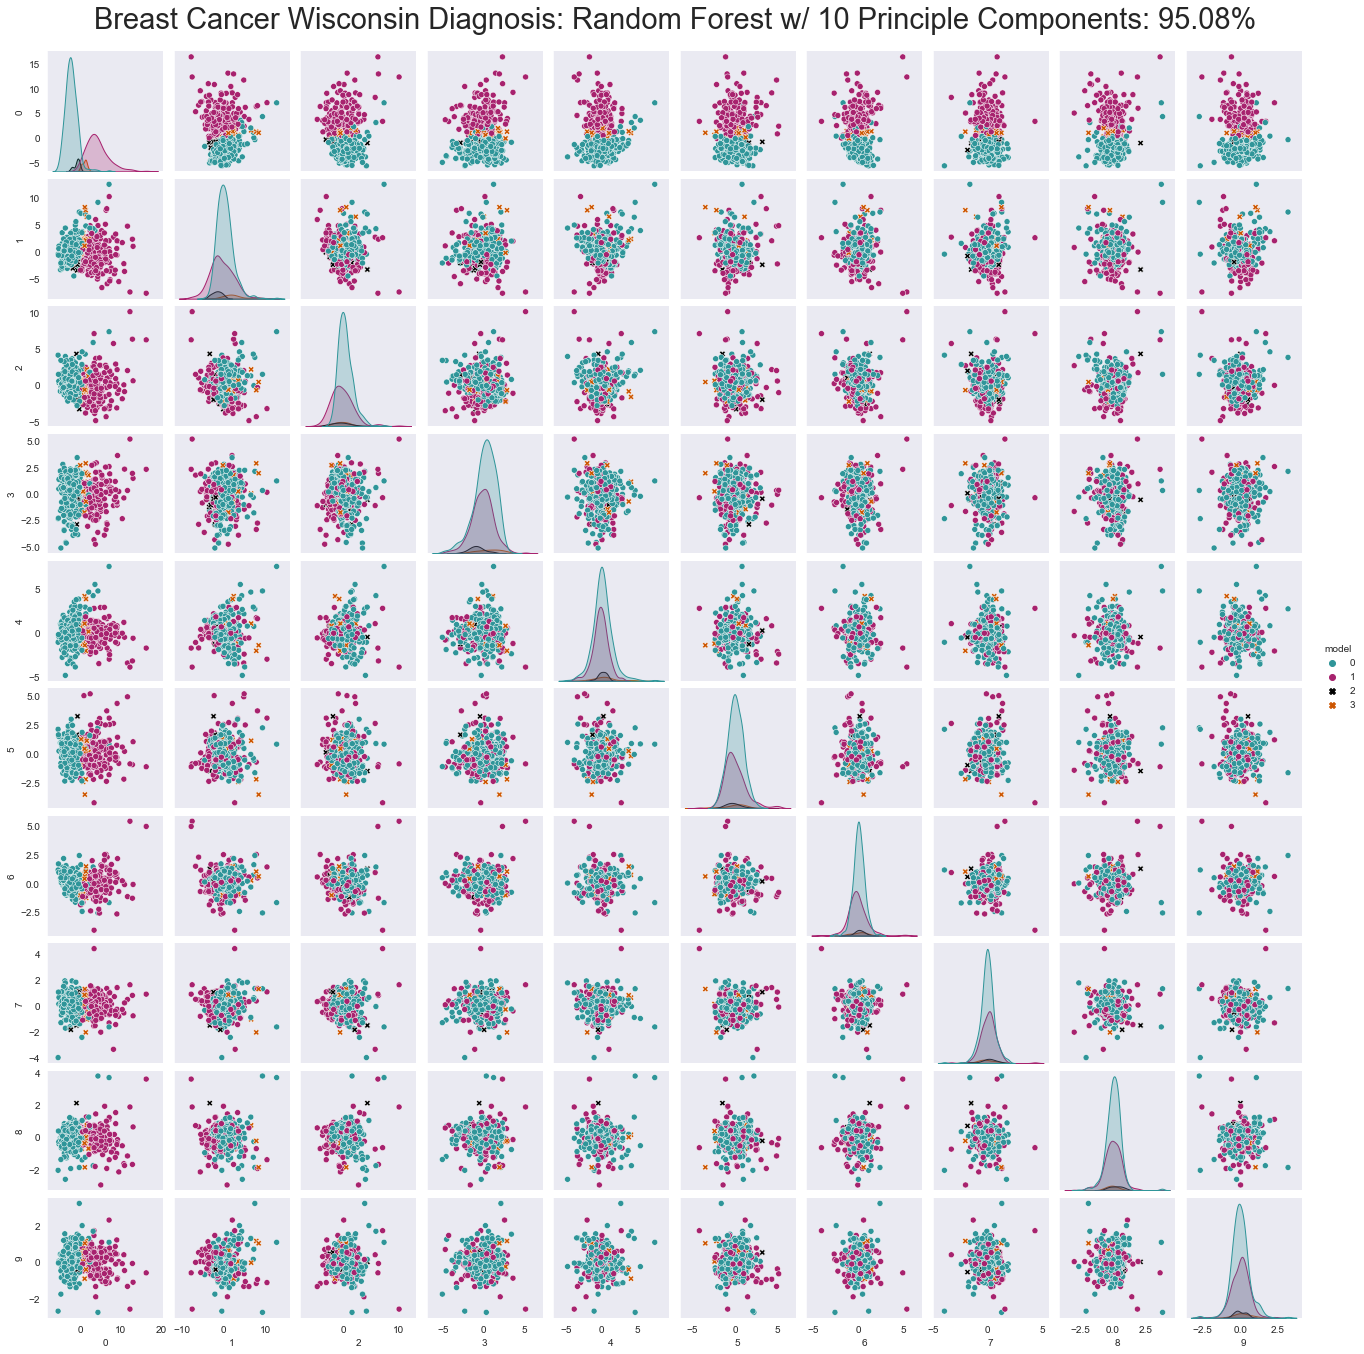

In [864]:
#Scatterplot

sns.set_style("dark")
flatui = ["#2F9599","#A7226E", "#000000", '#cc5500']
pairs = sns.pairplot(modelfinal,
             hue='model',
             palette= flatui,
             diag_kind='kde',
             markers=['o', 'o', 'X', 'X'],
             height=1.85)
plt.suptitle("Breast Cancer Wisconsin Diagnosis: Random Forest w/ 10 Principle Components: {}".format(am), y=1.02, fontsize = 29)



plt.savefig('BCWD.Tree.png', dpi=300)